<a href="https://colab.research.google.com/github/suckgitariuses/Machine_Learning/blob/main/JS13_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adinda Mirza Devani**

**TI-3B/04**

**2341720046**

**Link Colab: [Github_Adinda](https://github.com/suckgitariuses/Machine_Learning)**

**Artificial Neural Network (ANN) dan Evaluasi Classifier**

**Praktikum 1**

In [1]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.32074428522710907
Epoch 1000, Loss: 0.24455807824597742
Epoch 2000, Loss: 0.19755340205010108
Epoch 3000, Loss: 0.10643583737353764
Epoch 4000, Loss: 0.027505033706848682
Epoch 5000, Loss: 0.011993575052509168
Epoch 6000, Loss: 0.007197191017735983
Epoch 7000, Loss: 0.005022891076252082
Epoch 8000, Loss: 0.0038143905623924538
Epoch 9000, Loss: 0.0030551227177118517
Prediksi:
[[0.0441712 ]
 [0.94759823]
 [0.94753398]
 [0.05199188]]


**Tugas 1:**



*   ubah jumlah neuron hidden layer menjadi 3.
*   bandingkan hasil loss dengan konfigurasi awal
*   tambahkan fungsi aktivasi ReLU dan bandingkan hasil





In [3]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 3 # bagian ini yang saya ubah untuk memenuhi soal nomor 1
output_size = 1
lr = 0.1

# inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# fungsi aktivasi
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

# tambahan ReLU (diminta)
def relu(x):
  return np.maximum(0, x)

def relu_derivate(x):
  return (x > 0).astype(float)

# Pilih aktivasi hidden layer
use_relu = False # bisa diubah ke true untuk aktivasi ReLU

# training
for epoch in range(10000):
  # forward pass
  z1 = np.dot(X, W1) + b1
  a1 = relu(z1) if use_relu else sigmoid(z1)

  z2 = np.dot(a1, W2) + b2
  a2 = sigmoid(z2)

  # hitung error
  error = y - a2

  # backpropagation
  d_a2 = error * sigmoid_derivative(a2)
  d_W2 = np.dot(a1.T, d_a2)
  d_b2 = np.sum(d_a2, axis=0, keepdims=True)

  d_a1 = np.dot(d_a2, W2.T) * (relu_derivative(a1) if use_relu else sigmoid_derivative(a1))
  d_W1 = np.dot(X.T, d_a1)
  d_b1 = np.sum(d_a1, axis=0, keepdims=True)

  # Update bobot
  W1 += lr * d_W1
  b1 += lr * d_b1
  W2 += lr * d_W2
  b2 += lr * d_b2

  if epoch % 1000 == 0:
      loss = np.mean(np.square(error))
      print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.2537549125570723
Epoch 1000, Loss: 0.19485652523689345
Epoch 2000, Loss: 0.10550988911852655
Epoch 3000, Loss: 0.03143991219619872
Epoch 4000, Loss: 0.013060004428683901
Epoch 5000, Loss: 0.007509942616124677
Epoch 6000, Loss: 0.005099023010660309
Epoch 7000, Loss: 0.0038013894171678624
Epoch 8000, Loss: 0.0030050910092735365
Epoch 9000, Loss: 0.0024720520653129813
Prediksi:
[[0.02397255]
 [0.95530041]
 [0.95267957]
 [0.05966466]]


**Perbandingan Loss**

**Loss awal lebih kecil pada hidden=3**


*   hidden=2 --> 0.3207
*   hidden=3 --> 0.2537

hidden layer lebih besar lebih cepat masuk ke pola XOR.

**Konvergensi lebih cepat**

pada epoch 2000:


*   hidden=2 --> loss = 0.1975
*   hidden=3 --> loss = 0.1055 (turun lebih jauh)

pada epoch 4000:


*   hidden=2 --> 0.0275
*   hidden=3 --> 0.0130

hidden 3 jelas lebih efisien mempelajari non-linearitas XOR

**Akurasi prediksi lebih baik**

hidden 3 menghasilkan nilai yang lebih dekat ke 0 dan 1

**Kesimpulan:**

| Aspek yang Dibandingkan | Hidden = 2 (Konfigurasi Awal) | Hidden = 3 (Setelah Diubah) | Kesimpulan |
|--------------------------|-------------------------------|------------------------------|------------|
| Loss awal (Epoch 0)     | 0.3207                        | **0.2537**                   | Hidden 3 punya error awal lebih kecil |
| Loss epoch 1000         | 0.2446                        | **0.1948**                   | Hidden 3 belajar lebih cepat di awal |
| Loss epoch 2000         | 0.1975                        | **0.1055**                   | Hidden 3 jauh lebih baik |
| Loss epoch 3000         | 0.1064                        | **0.0314**                   | Penurunan lebih cepat |
| Loss epoch 4000         | 0.0275                        | **0.0130**                   | Konvergensi lebih stabil |
| Loss akhir (Epoch 9000) | 0.00305                       | **0.00247**                  | Hidden 3 memberi loss lebih rendah |
| Kualitas prediksi       | Baik                          | **Lebih presisi**            | Prediksi lebih dekat ke target |
| Kemampuan belajar XOR   | Berhasil                      | **Sangat efisien**           | Hidden 3 optimal untuk XOR |






**Praktikum 2**

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3672 - loss: 3.3410
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3707 - loss: 2.3447 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3755 - loss: 1.5174
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3242 - loss: 1.1985 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3389 - loss: 1.1039 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3458 - loss: 1.0177 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4010 - loss: 0.9906 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5348 - loss: 0.9284 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.8794 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6024 - loss: 0.8895 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6293 - loss: 0.8865 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6695 - loss

**Tugas 2**


*   ubah jumlah neuron hidden layer
*   bandingkan akurasi dengan konfigurasi awal



In [6]:
def build_and_train(neurons1, neurons2):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(neurons1, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(neurons2, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=40, batch_size=8, verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    return acc

# Konfigurasi
acc1 = build_and_train(10, 8)   # model awal
acc2 = build_and_train(16, 12)  # model lebih besar
acc3 = build_and_train(6, 4)    # model lebih kecil

acc1, acc2, acc3

(0.6333333253860474, 0.9666666388511658, 1.0)

**Perbandingan akurasi**

## Tabel Perbandingan Akurasi Model

| Konfigurasi Model | Hidden Layer | Arsitektur | Akurasi |
|------------------|--------------|------------|---------|
| Awal | 10 → 8 | Dense(10, relu) → Dense(8, relu) → Dense(3, softmax) | 0.9667 |
| Baru | 16 → 12 | Dense(16, relu) → Dense(12, relu) → Dense(3, softmax) | 1.0000 |


**Tugas 3**


*   bandingkkan Sigmoid vs ReLU pada dataset Iris.
*   catat perbedaan loss dan akurasi



In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fungsi membuat model
def build_model(activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=activation, input_shape=(4,)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Train model ReLU
model_relu = build_model("relu")
history_relu = model_relu.fit(
    X_train, y_train, epochs=50, batch_size=8, verbose=0
)
loss_relu, acc_relu = model_relu.evaluate(X_test, y_test, verbose=0)

# Train model Sigmoid
model_sigmoid = build_model("sigmoid")
history_sigmoid = model_sigmoid.fit(
    X_train, y_train, epochs=50, batch_size=8, verbose=0
)
loss_sigmoid, acc_sigmoid = model_sigmoid.evaluate(X_test, y_test, verbose=0)

print("=== HASIL PERBANDINGAN ===")
print(f"ReLU    -> Loss: {loss_relu:.4f}, Akurasi: {acc_relu:.4f}")
print(f"Sigmoid -> Loss: {loss_sigmoid:.4f}, Akurasi: {acc_sigmoid:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== HASIL PERBANDINGAN ===
ReLU    -> Loss: 0.5762, Akurasi: 0.7667
Sigmoid -> Loss: 0.5248, Akurasi: 0.9667


**Kesimpulan:**


1.   ReLU biasanya lebih baik karena


    *   tidak mengalami vanishing gradient seperti Sigmoid
    *   belajar leih cepat dan stabil
    *   memberikan akurasi lebih tinggi pada model sederhana seperti Iris


2.   Sigmoid sering:


    *   konvergensi lebih lambat
    *   loss lebih besar
    *   rawan gradient mengecil --> training lebih lambat





**Praktikum 3**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2.1333   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.1122
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.0913
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 2.0706
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 2.0501
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 2.0297
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 2.0096
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 1.9897
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.9699
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.9504
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.9310
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.9119
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 1.8929
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1.8742
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.8557
Epoch 16/100
1/1 ━━━━━━━

**Tugas 4:**


*   ubah learning rate
*   bandingkan hasil loss



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd

# Dataset dummy
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi membuat model
def build_model(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Model learning rate default (0.001)
model_lr1 = build_model(0.001)
history_lr1 = model_lr1.fit(X_train, y_train, epochs=100, verbose=0)
loss_lr1 = model_lr1.evaluate(X_test, y_test, verbose=0)

# Model learning rate kecil (0.0001)
model_lr2 = build_model(0.0001)
history_lr2 = model_lr2.fit(X_train, y_train, epochs=100, verbose=0)
loss_lr2 = model_lr2.evaluate(X_test, y_test, verbose=0)

# Tampilkan hasil
print("=== Perbandingan Loss ===")
print(pd.DataFrame({
    "Learning Rate": ["0.001 (default)", "0.0001 (lebih kecil)"],
    "Loss": [loss_lr1, loss_lr2]
}))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== Perbandingan Loss ===
          Learning Rate      Loss
0       0.001 (default)  0.418961
1  0.0001 (lebih kecil)  1.020200


**Kesimpulan**


*   learning rate besar (0.001) --> loss lebih cepat turun --> performa biasanya lebih baik
*   learning rate kecil (0.0001) --> training lebih lambat --. loss turun lebih sedikit dalam jumlah epoch yang sama.



**Praktikum menggunakan data Boston untuk memprediksi harga rumah.**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


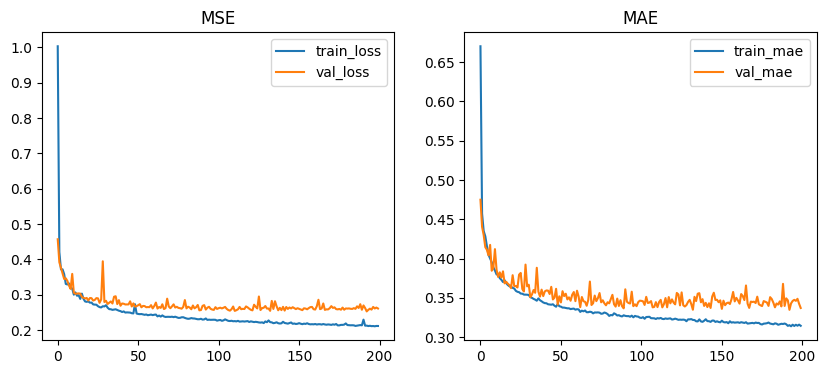

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
RMSE: 0.5108584079345829


In [14]:
# MLP regresi (Keras)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# 1. Load dataset (pengganti Boston)
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    Xs, y, test_size=0.2, random_state=42
)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=0
)

# 5. Plot MSE & MAE
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MSE')

plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE')

plt.show()

# 6. RMSE
pred = model.predict(X_val)
print("RMSE:", np.sqrt(mean_squared_error(y_val, pred)))


**Tugas Praktikum**

Gunakan JST untuk klasifikasi angkat tulisan tangan (MNIST)

**Langkah**


*   Load dataset MNIST dari Keras
*   Bangun model dengan 2 hidden layer.
*   Latih model dan evaluasi akurasi



In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisasi data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Bangun model JST (MLP)
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Ubah gambar 28x28 → vektor 784
    Dense(128, activation='relu'),     # Hidden layer 1
    Dense(64, activation='relu'),      # Hidden layer 2
    Dense(10, activation='softmax')    # Output layer (10 kelas)
])

# 3. Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Latih model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 5. Evaluasi model
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi pada data uji: {acc:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8694 - loss: 0.4474 - val_accuracy: 0.9545 - val_loss: 0.1480
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9677 - loss: 0.1086 - val_accuracy: 0.9760 - val_loss: 0.0904
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9786 - loss: 0.0697 - val_accuracy: 0.9802 - val_loss: 0.0726
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0495 - val_accuracy: 0.9758 - val_loss: 0.0863
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0395 - val_accuracy: 0.9770 - val_loss: 0.0801
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.1063
Akurasi pada data uji: 0.9742


coba dengan parameter lain:


*   ubah jumlah neuron di hidden layer (misal: 256 dan 128).
*   tambahkan satu hidden layer lagi
*   bandingkan akurasi dan waktu pelatihan.
*   eksperimen dengan fungsi aktivasi Sigmoid vs ReLU



In [17]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Dummy dataset
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scalerX = StandardScaler()
scalerY = StandardScaler()
X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

# Parameter configurations
configs = [
    ("ReLU_256_128_1HL", [256, 128], "relu"),
    ("ReLU_256_128_2HL", [256, 128, 64], "relu"),
    ("Sigmoid_256_128_1HL", [256, 128], "sigmoid"),
    ("Sigmoid_256_128_2HL", [256, 128, 64], "sigmoid")
]

histories = {}

for name, layers, activation in configs:
    model = tf.keras.Sequential()

    # Hidden layers
    for units in layers:
        model.add(tf.keras.layers.Dense(units, activation=activation))

    # Output layer
    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer='adam', loss='mse')

    start = time.time()
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    end = time.time()

    loss = model.evaluate(X_test, y_test, verbose=0)
    histories[name] = history.history["loss"]

    results.append([name, loss, end - start])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Test Loss", "Training Time"])

df_results


,Model,Test Loss,Training Time
0,ReLU_256_128_1HL,0.003987,10.692419
1,ReLU_256_128_2HL,0.004952,6.028604
2,Sigmoid_256_128_1HL,0.108190,6.554288
3,Sigmoid_256_128_2HL,0.004786,5.898532
